In [163]:
df_temp.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,Profits,Profits_in_PERCENT
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,909.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,228436354,152.290903
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,185238201,168.398365
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1868178225,934.089113
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1316249360,692.762821


In [149]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import datetime
% matplotlib inline
mpl.rcParams["font.size"] = 20

In [2]:
def Get_Best_Correlation_column(DataFrmeIn,target,positive_MoreThan =0.10 , Negative_lessThan= -0.10,GetDf=False):
    '''
    DataFrmeIn = Your Datafreme
    target = coulmn name target 
    moreThan = set the minimum positive Correlation value by defult =  0.10
    lessThan = set the maximum Negative Correlation value by defult = -0.10
    GetDf = in case want to return Correlation Dataframe and Correlation Name
    
    
    it will return any  correlation have more than  0.10  or  less than  -0.10 with target
    '''
    # take all correlation
    all_correlation_with_target = DataFrmeIn.corr().loc[[target]]

    # all_correlation_with_target > {positive_MoreThan} or all_correlation_with_target < {Negative_lessThan}
    best_correlation_column = all_correlation_with_target.T[(all_correlation_with_target.T[target] > positive_MoreThan) | (all_correlation_with_target.T[target] < Negative_lessThan)].T.columns
    # in case GetDf true it will return this
    best_correlation_df = all_correlation_with_target.T[(all_correlation_with_target.T[target] > positive_MoreThan) | (all_correlation_with_target.T[target] < Negative_lessThan)]
    # remove target column from the list
    best_correlation_column = best_correlation_column.drop(target)
    if(GetDf):
        return(best_correlation_df,list(best_correlation_column))
    else:
        return(list(best_correlation_column))

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [159]:
df = pd.read_csv('../Data/P2/tmdb-movies_Cleaning_4')

In [160]:
df_temp = df[['popularity',
    'budget', 
    'revenue',
    'original_title',
    'runtime',
    'release_date',
    'vote_count',
    'vote_average',
    'release_year',
    'Profits',
    'Profits_in_PERCENT']]

In [211]:
df_temp.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,Profits,Profits_in_PERCENT
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,909.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,228436354,152.290903
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,185238201,168.398365
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1868178225,934.089113
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1316249360,692.762821


In [189]:
year = df_temp.groupby('release_year')['revenue'].sum().index
budget = df_temp.groupby('release_year')['budget'].sum().values
revenue = df_temp.groupby('release_year')['revenue'].sum().values

In [241]:
budget

array([  22056948,   46137000,   54722126,   73331500,   39483161,
         70205115,   57554800,  100652000,   71939000,   42129087,
        126961946,   75997000,   36279254,   65190783,   76970000,
         56279000,  122150000,  161580000,  208997011,  254814000,
        362500000,  338757786,  437795002,  518007412,  729211964,
        748720637,  693711113,  709455811,  922848000, 1079656360,
       1278354025, 1466233000, 1433325538, 1777628653, 2220207032,
       2831884377, 3671080000, 4751086675, 4493160000, 5745235106,
       5736200000, 5619029000, 5827640255, 6225857394, 7071090222,
       7294284349, 7238785300, 7586846112, 7714762597, 8550794364,
       9331845996, 8976589239, 8257783942, 9203619761, 7908350621,
       7591947557])

[]

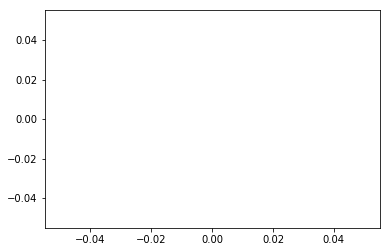

In [240]:
plt.plot(ydate=list(budget))

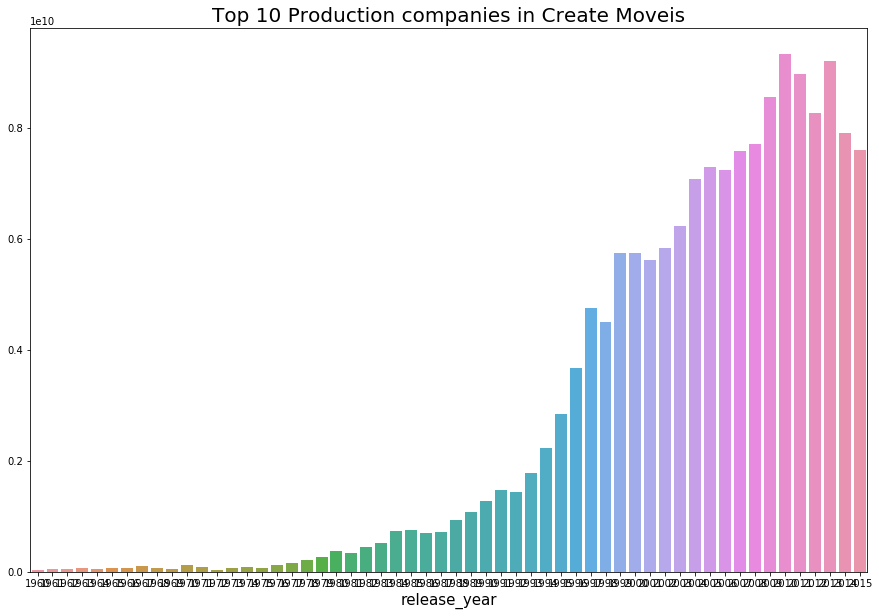

In [228]:
all_production_companies_movies_count = df[[x for x in df.columns if "production_companies" in x]].sum().sort_values(ascending=False)
Top10 = all_production_companies_movies_count[:10]
Top10_Columns_Names = [x for x in Top10.index]
Top10_Names = [x.replace('_production_companies','') for x in Top10.index]


fig , ax = plt.subplots(nrows=1,ncols=1,figsize= (15,10))
ax.set_title('Top 10 Production companies in Create Moveis',fontsize=20)
ax.set_xlabel('Moveis Count',fontsize=15)
sns.barplot(Top10.values,Top10_Names,ax=ax)
plt.show()

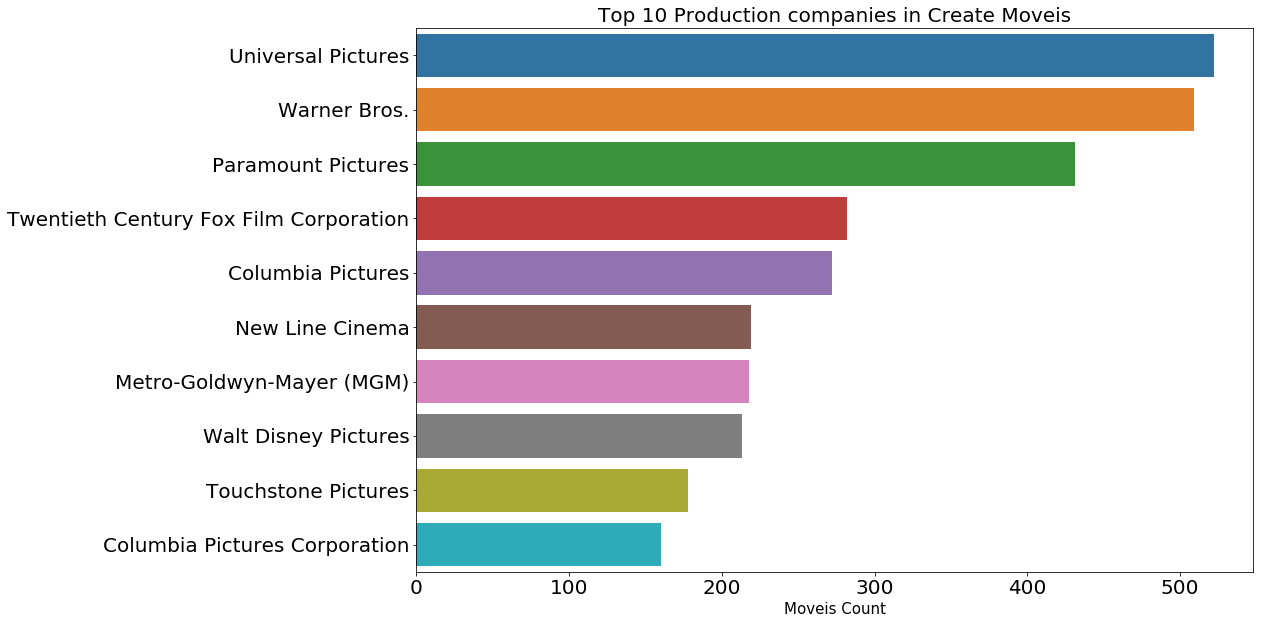

In [151]:
# all_production_companies_movies_count 


all_production_companies_movies_count = df[[x for x in df.columns if "production_companies" in x]].sum().sort_values(ascending=False)
Top10 = all_production_companies_movies_count[:10]
Top10_Columns_Names = [x for x in Top10.index]
Top10_Names = [x.replace('_production_companies','') for x in Top10.index]


fig , ax = plt.subplots(nrows=1,ncols=1,figsize= (15,10))
ax.set_title('Top 10 Production companies in Create Moveis',fontsize=20)
ax.set_xlabel('Moveis Count',fontsize=15)
sns.barplot(Top10.values,Top10_Names,ax=ax)
plt.show()

In [ ]:
d

In [152]:
def Get_Statistic_Chart_For_this(col_name):
    df_temp = df[df[col_name] == 1].copy()
    
    fig , ax = plt.subplots(nrows=2,ncols=1,figsize= (20,30))

    # what is most genres .?
    all_genres_movies_count = df_temp[[x for x in df_temp.columns if "genres" in x]].sum().sort_values(ascending=False)
    Names = [x.replace('_genres','') for x in all_genres_movies_count.index]

    ax.set_title(f' genres Moveis for {col_name}',fontsize=20)
    ax.set_xlabel('Moveis Count',fontsize=15)
    sns.barplot(all_genres_movies_count.values,Names,ax=ax[0])
    
    
    plt.show()

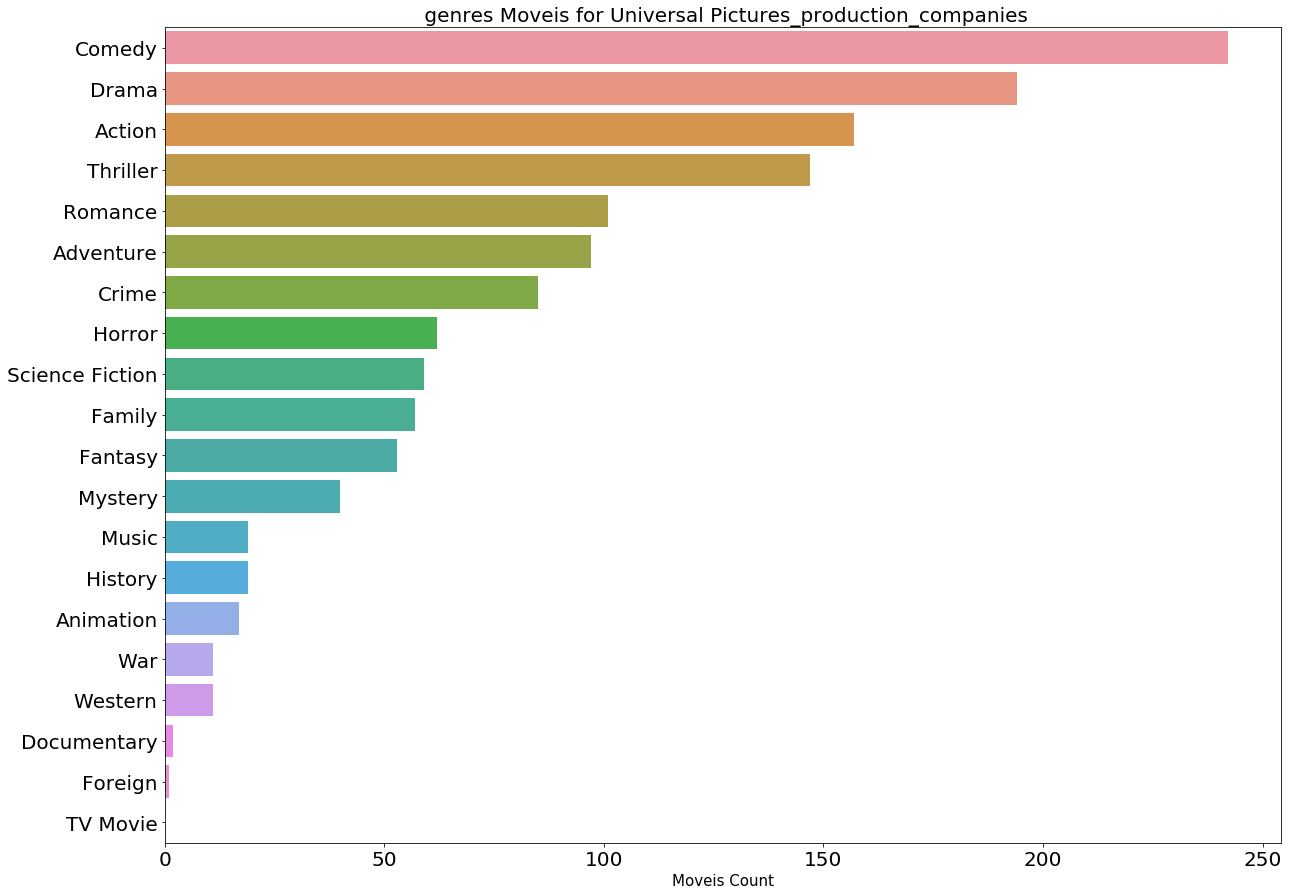

In [153]:
Get_Statistic_Chart_For_this("Universal Pictures_production_companies")

In [125]:
df

NameError: name 'df_temp' is not defined

In [121]:
[x for x in Top10_Columns_Names]

['Universal Pictures_production_companies',
 'Warner Bros._production_companies',
 'Paramount Pictures_production_companies',
 'Twentieth Century Fox Film Corporation_production_companies',
 'Columbia Pictures_production_companies',
 'New Line Cinema_production_companies',
 'Metro-Goldwyn-Mayer (MGM)_production_companies',
 'Walt Disney Pictures_production_companies',
 'Touchstone Pictures_production_companies',
 'Columbia Pictures Corporation_production_companies']

In [108]:
df[['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'Profits',
       'Profits_in_PERCENT']]

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,Profits,Profits_in_PERCENT
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,909.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,228436354,152.290903
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,185238201,168.398365
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1868178225,934.089113
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1316249360,692.762821
5,9.110700,135000000,532950503,The Revenant,156,2015-12-25,3929,7.2,2015,397950503,294.778150
6,8.654359,155000000,440603537,Terminator Genisys,125,2015-06-23,2598,5.8,2015,285603537,184.260346
7,7.667400,108000000,595380321,The Martian,141,2015-09-30,4572,7.6,2015,487380321,451.278075
8,7.404165,74000000,1156730962,Minions,91,2015-06-17,2893,6.5,2015,1082730962,1463.149949
9,6.326804,175000000,853708609,Inside Out,94,2015-06-09,3935,8.0,2015,678708609,387.833491


In [113]:
[x for x in df.columns if "production_companies" in x][2]

'Fries Entertainment Films_production_companies'

In [114]:
df[df['Fries Entertainment Films_production_companies'] == 1]

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,Profits,...,Rising Storm Productions_production_companies,Screen NSW_production_companies,Emedia Films_production_companies,Mango Farms_production_companies,Sly Predator_production_companies,Sneaky Pete Productions_production_companies,imX Communications_production_companies,Wonderland Sound and Vision_production_companies,Sheinberg Productions_production_companies,O.N.C. Entertainment_production_companies
8649,0.213026,0,0,Flowers in the Attic,93,1987-11-20,25,6.9,1987,0,...,0,0,0,0,0,0,0,0,0,0


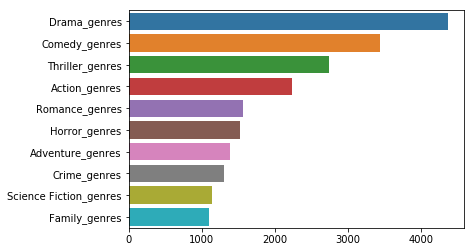

In [8]:
# all_genres_movies_count 
all_genres_movies_count = df[[x for x in df.columns if "genres" in x]].sum().sort_values(ascending=False)
temp = all_genres_movies_count
sns.barplot(temp[:10].values,temp[:10].index)

In [ ]:
# all_director_movies_count 
all_director_movies_count = df[[x for x in df.columns if "director" in x]].sum().sort_values(ascending=False)
temp = all_director_movies_count
sns.barplot(temp[:10].values,temp[:10].index)

In [ ]:
# all_cast_movies_count 
all_cast_movies_count = df[[x for x in df.columns if "CAST" in x]].sum().sort_values(ascending=False)
temp = all_cast_movies_count
sns.barplot(temp[:10].values,temp[:10].index)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!